In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [168]:
df = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
df['stationary'] = df['Close'] - df['Close'].shift(1)
df.columns = ['week', 'close', 'stationary']
# df.set_index('week', inplace=True)
# df.index = pd.to_datetime(df.index, format='%Y-W%W')
df.head()

,week,close,stationary
0,1971-W27,890.19,NaN
1,1971-W28,901.80,11.61
2,1971-W29,888.51,-13.29
3,1971-W30,887.78,-0.73
4,1971-W31,858.43,-29.35


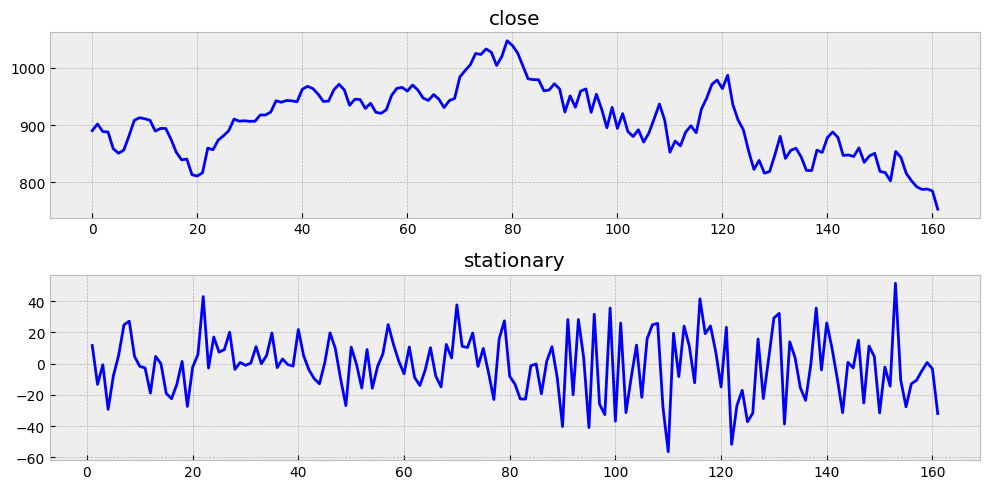

In [169]:
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 5))
    layout = (2, 1)
    for idx, col in enumerate(['close', 'stationary']):
        ts_ax = plt.subplot2grid(layout, (idx, 0))
        df[col].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(col)
    plt.tight_layout()

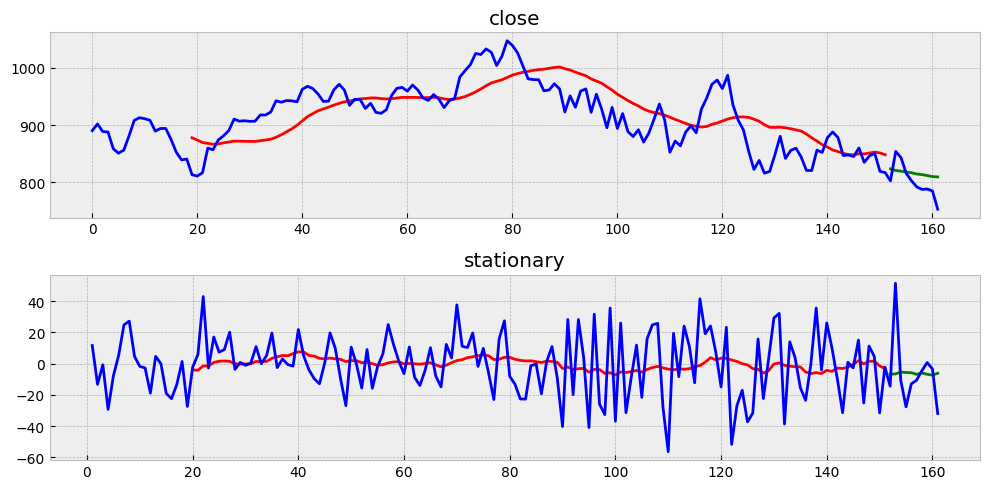

In [170]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean()

def predict(series, N, n_pred):
    new_series = series.copy()
    for _ in range(n_pred):
        new_series = pd.concat([new_series, pd.Series([new_series[-N:].mean()])], ignore_index=True)
    return new_series[-n_pred:]

close_ma = moving_average(df['close'][:-10], 20)
stationary_ma = moving_average(df['stationary'][:-10], 20)

close_ma_pred = predict(df['close'], 20, 10).set_axis(df.index[-10:])
stationary_ma_pred = predict(df['stationary'], 20, 10).set_axis(df.index[-10:])
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 5))
    layout = (2, 1)
    for idx, (col, ma, pred) in enumerate(zip(['close', 'stationary'], [close_ma, stationary_ma], [close_ma_pred, stationary_ma_pred])):
        ts_ax = plt.subplot2grid(layout, (idx, 0))
        
        ma.plot(ax=ts_ax, color='red', label='MA(20)')
        pred.plot(ax=ts_ax, color='green', label='MA(20) prediction')
        df[col].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(col)
    plt.tight_layout()

In [171]:
from sklearn.metrics import mean_squared_error

series = df["close"]
train, test = series[:-30], series[-30:]

results = {}
results['default'] = {}
results['stationary'] = {}


RMSE: 3227.4169534948514


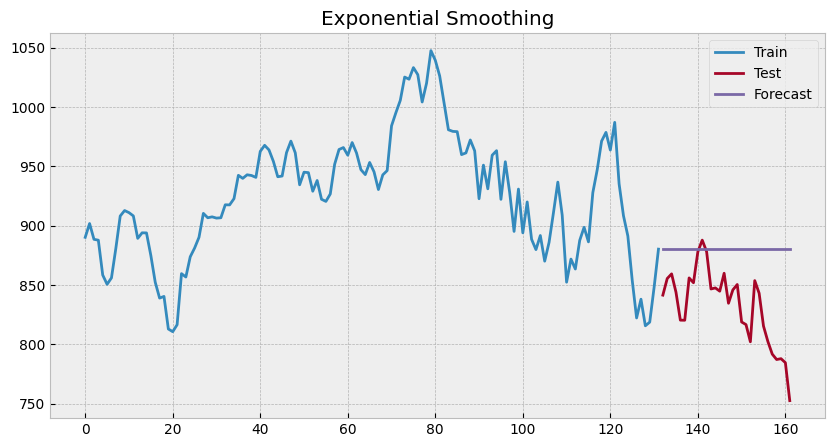

{'default': {'SimpleExpSmoothing': 3227.4169534948514}, 'stationary': {}}

In [172]:
from statsmodels.tsa.api import SimpleExpSmoothing

#  Exponential Smoothing
model = SimpleExpSmoothing(train)
fit = model.fit()
forecast = fit.forecast(30)

# Calculate RMSE
rmse = mean_squared_error(test, forecast)
print("RMSE:", rmse)

# Plot results
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 5))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast, label='Forecast')
    plt.legend()
    plt.title("Exponential Smoothing")
    plt.show()
results['default'][f'{model.__class__.__name__}'] =  rmse
results # 

RMSE: 1568.8199442204495


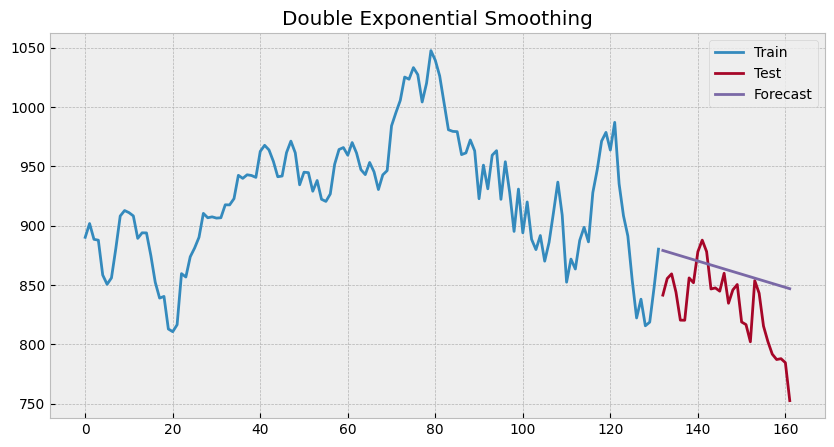

In [173]:
from statsmodels.tsa.api import Holt

model_double = Holt(train)
model_double_fit = model_double.fit()
forecast = model_double_fit.forecast(30)

# Calculate RMSE
rmse = mean_squared_error(test, forecast)
print("RMSE:", rmse)

# Plot results
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 5))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast, label='Forecast')
    plt.legend()
    plt.title("Double Exponential Smoothing")
    plt.show()

results['default'][f'{model_double.__class__.__name__}'] =  rmse

RMSE: 557.0969697932607


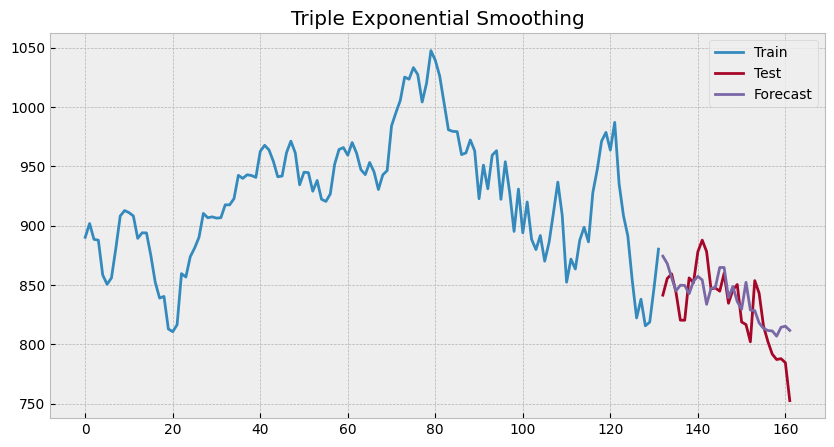

In [174]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    train, trend="add", seasonal="add", seasonal_periods=52)

# Fit the model to the data
model_triple_fit = model_triple.fit() # smothing_level = 0.1, smothing_trend = 0.1

# Make predictions
forecast = model_triple_fit.forecast(30)

# Calculate RMSE
rmse = mean_squared_error(test, forecast)
print("RMSE:", rmse)

# Plot results
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 5))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast, label='Forecast')
    plt.legend()
    plt.title("Triple Exponential Smoothing")
    plt.show()

results['default'][f'{model_triple.__class__.__name__}'] =  rmse

# Stationary

In [175]:
series = df["stationary"].dropna()
train, test = series[:-30], series[-30:]

RMSE: 417.32392039296155


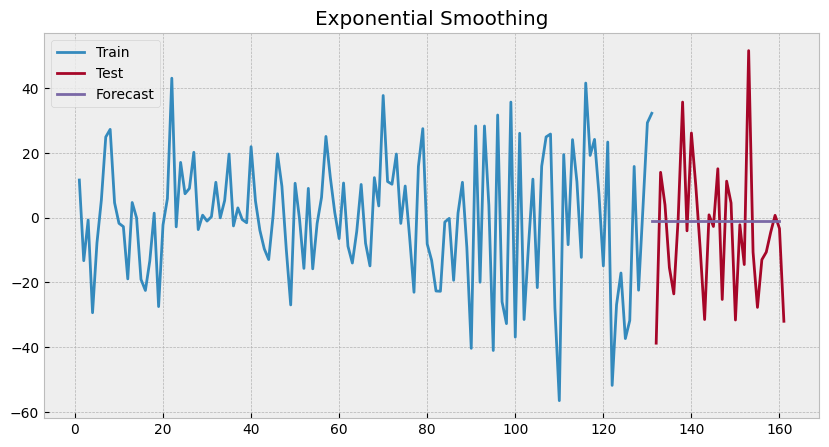

In [176]:
#  Exponential Smoothing
model = SimpleExpSmoothing(train)
fit = model.fit() # не указываем smothing level. Идет автоподбор
forecast = fit.forecast(30)

# Calculate RMSE
rmse = mean_squared_error(test, forecast)
print("RMSE:", rmse)

# Plot results
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 5))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast, label='Forecast')
    plt.legend()
    plt.title("Exponential Smoothing")
    plt.show()
    
results['stationary'][f'{model.__class__.__name__}'] =  rmse


RMSE: 21023.519511606653


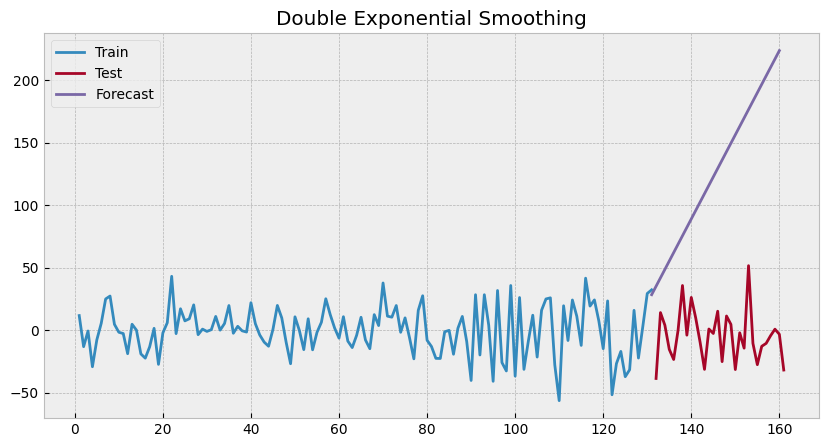

In [177]:
model_double = Holt(train)
model_double_fit = model_double.fit()
forecast = model_double_fit.forecast(30)

# Calculate RMSE
rmse = mean_squared_error(test, forecast)
print("RMSE:", rmse)

# Plot results
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 5))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast, label='Forecast')
    plt.legend()
    plt.title("Double Exponential Smoothing")
    plt.show()

results['stationary'][f'{model_double.__class__.__name__}'] =  rmse

RMSE: 459.42165104224847


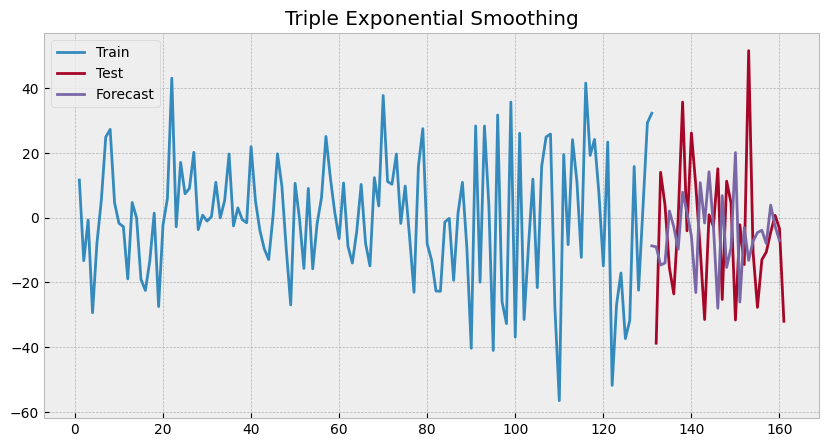

In [178]:
# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    train, trend="add", seasonal="add", seasonal_periods=52)

# Fit the model to the data
model_triple_fit = model_triple.fit()

# Make predictions
forecast = model_triple_fit.forecast(30)

# Calculate RMSE
rmse = mean_squared_error(test, forecast)
print("RMSE:", rmse)

# Plot results
with plt.style.context('bmh'):
    plt.figure(figsize=(10, 5))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(forecast, label='Forecast')
    plt.legend()
    plt.title("Triple Exponential Smoothing")
    plt.show()

results['stationary'][f'{model_triple.__class__.__name__}'] =  rmse

In [179]:
pd.DataFrame(results)

,default,stationary
SimpleExpSmoothing,3227.416953,417.323920
Holt,1568.819944,21023.519512
ExponentialSmoothing,557.096970,459.421651


Лучше всего в нестационарном ряде показала себя модель 3-го экспоненциального сглаживания, у нее получилось выявить тренд и сезонность - это ее основная фишка

В стационарном ряде нет тренда, поэтому модель 2-го сглаивания, которая ищет тренд показала ужасные результаты. 3-е сглаживание смогло найти сезонность, но лучший результат показала все равно модель простого экспоненциального сглаживания



In [ ]:
# https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html